##TASK 4 (SPAM SMS DETECTION)
Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [115]:
import numpy as np
import pandas as pd

encoding='ISO-8859-1': This specifies the character encoding used to read the file. ISO-8859-1 (also known as Latin-1) is a character encoding standard that includes characters from the Latin alphabet.

In [116]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [117]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Drop the last three columns ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4') since they are empty.

In [118]:
# Drop the unwanted columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [119]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [120]:
df.isnull().sum()


v1    0
v2    0
dtype: int64

For better understanding, rename the columns: 'v1' to 'label' and 'v2' to 'message'.

In [121]:
# Rename columns for easier access
df.columns = ['label', 'message']

In [122]:
df.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


Convert the labels to binary values where 'ham' is 0 and 'spam' is 1.

In [123]:
#(ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [124]:
df.head(2)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


This dataset contains 403 unique types of duplicate values.

In [125]:
df.duplicated().sum()

403

The duplicate values in the dataset are distributed as follows: 76.7% (309) for the '0' label and 23.3% (94) for the '1' label.

In [126]:
import plotly.express as px

# Function to count duplicates for each label
def count_duplicated_by_label(df, label_column):
    duplicated_counts = df[df.duplicated()].groupby(label_column).size()
    return duplicated_counts

# Get the number of duplicates for each 'label'
duplicated_counts = count_duplicated_by_label(df, 'label')

# Create a DataFrame from the duplicated counts
duplicated_counts_df = duplicated_counts.reset_index()
duplicated_counts_df.columns = ['label', 'count']

# Create an interactive pie chart
fig = px.pie(duplicated_counts_df, values='count', names='label', title='Number of Duplicates for Each Label')
fig.show()


After removing all duplicates, the dataset contains no duplicate values.

In [127]:
import pandas as pd
import plotly.express as px

# Remove all duplicate rows
df = df.drop_duplicates()

# Function to count duplicates for each label
def count_duplicated_by_label(df, label_column):
    duplicated_counts = df[df.duplicated()].groupby(label_column).size()
    return duplicated_counts

# Get the number of duplicates for each 'label' in the original DataFrame
duplicated_counts = count_duplicated_by_label(df, 'label')

if duplicated_counts.empty:
    print('There is no duplicate value')
else:
    # Create a DataFrame from the duplicated counts
    df = duplicated_counts.reset_index()
    df.columns = ['label', 'count']

    # Create an interactive pie chart
    fig = px.pie(df, values='count', names='label', title='Number of Duplicates for Each Label')
    fig.show()


There is no duplicate value


In [128]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


The pie chart shows that 1 label comprises 12.6% (653) of the dataset, while 0 label makes up 87.4% (4516).

In [129]:
# Count the occurrences of each label
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Create an interactive pie chart
fig = px.pie(label_counts, values='count', names='label', title='Distribution of Labels',
             labels={'count': 'Count'},
             hover_data=['count'])

# Update traces to show the label, percent, and count
fig.update_traces(textinfo='label+percent+value', insidetextorientation='radial',
                  texttemplate='%{label}<br>%{percent}<br>%{value} ')

# Show the chart
fig.show()


To compute metrics from the 'message' column, we'll count the length of each message, total number of words, and total number of sentences.

In [130]:
# Calculate the length of each message and store it in a new column 'len'
df['len'] = df['message'].apply(len)

# Calculate the total number of words in each message and store it in a new column 'total_word'
df['total_word'] = df['message'].apply(lambda x: len(x.split()))

# Function to count the number of sentences in each message
def count_sentences(text):
    # Count sentences using punctuation marks . ! ?
    sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
    sentences = [sentence.strip() for sentence in ' '.join(sentences).split('!') if sentence.strip()]
    sentences = [sentence.strip() for sentence in ' '.join(sentences).split('?') if sentence.strip()]
    return len(sentences)

# Calculate the total number of sentences in each message and store it in a new column 'total_sentence'
df['total_sentence'] = df['message'].apply(count_sentences)

<ipython-input-130-31e4e62e396b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-130-31e4e62e396b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-130-31e4e62e396b>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
df

,label,message,len,total_word,total_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,1
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,1
5570,0,The guy did some bitching but I acted like i'd...,125,26,1


# Analysis

In [132]:
df.columns

Index(['label', 'message', 'len', 'total_word', 'total_sentence'], dtype='object')

This table provides descriptive statistics for three columns: 'label', 'len' (length of messages), 'total_word' (total number of words per message), and 'total_sentence' (total number of sentences per message).

- **Count**: Indicates the number of messages analyzed, which is 5169.
- **Mean**: For the 'label' column, the mean of 0.126330 indicates that about 12.63% of messages are labeled as spam (1), while 87.37% are labeled as ham (0). For 'len', 'total_word', and 'total_sentence', it represents the average length, number of words, and number of sentences per message, respectively.
- **Std**: Shows the standard deviation, which measures the dispersion or spread of the data around the mean. For 'label', it reflects the variability in the distribution of spam and ham messages.
- **Min**: The smallest value observed in each column. 'label' has a minimum of 0 (ham), while 'len', 'total_word', and 'total_sentence' have their respective minimum values indicating the smallest message length, word count, and sentence count observed.
- **25%, 50%, 75%**: These are the quartiles of the data distribution. They indicate the values below which a certain percentage of observations fall. For example, 25% of messages have a length (len) of 36 characters or less.
- **Max**: The largest value observed in each column. 'label' has a maximum of 1 (spam), indicating the highest proportion of spam messages in the dataset. 'len', 'total_word', and 'total_sentence' have their respective maximum values, showing the longest message length, word count, and sentence count observed.

In [133]:
# Descriptive Statistics
print(df.describe())

             label          len   total_word  total_sentence
count  5169.000000  5169.000000  5169.000000     5169.000000
mean      0.126330    78.977945    15.340685        1.142581
std       0.332253    58.236293    11.068488        0.489028
min       0.000000     2.000000     1.000000        1.000000
25%       0.000000    36.000000     7.000000        1.000000
50%       0.000000    60.000000    12.000000        1.000000
75%       0.000000   117.000000    22.000000        1.000000
max       1.000000   910.000000   171.000000        7.000000


The distributions of the three metrics—'len' (length of messages), 'total_word' (total number of words per message), and 'total_sentence' (total number of sentences per message) are summarized as follows:

- **Length ('len')**:
  This indicates that the average length of messages is around 78.98 characters, with a median length of 60 characters. The mode, or most frequently occurring length, is 22 characters. A skewness of 2.61 suggests that the distribution is positively skewed, meaning there are more shorter messages and a longer tail of longer messages.

- **Total Words ('total_word')**:
  This metric indicates that the average number of words per message is approximately 15.34, with a median of 12 words. The mode, or most frequent word count, is 6 words. The skewness of 2.74 shows a positive skew, indicating a distribution where there are more messages with fewer words and fewer messages with a larger number of words.

- **Total Sentences ('total_sentence')**:
  For this metric, the average number of sentences per message is 1.14, with a median of 1 sentence. The mode, or most frequent sentence count, is also 1 sentence. A skewness of 5.14 indicates a highly positively skewed distribution, suggesting that the majority of messages contain only 1 sentence, with a long tail of messages containing more sentences.


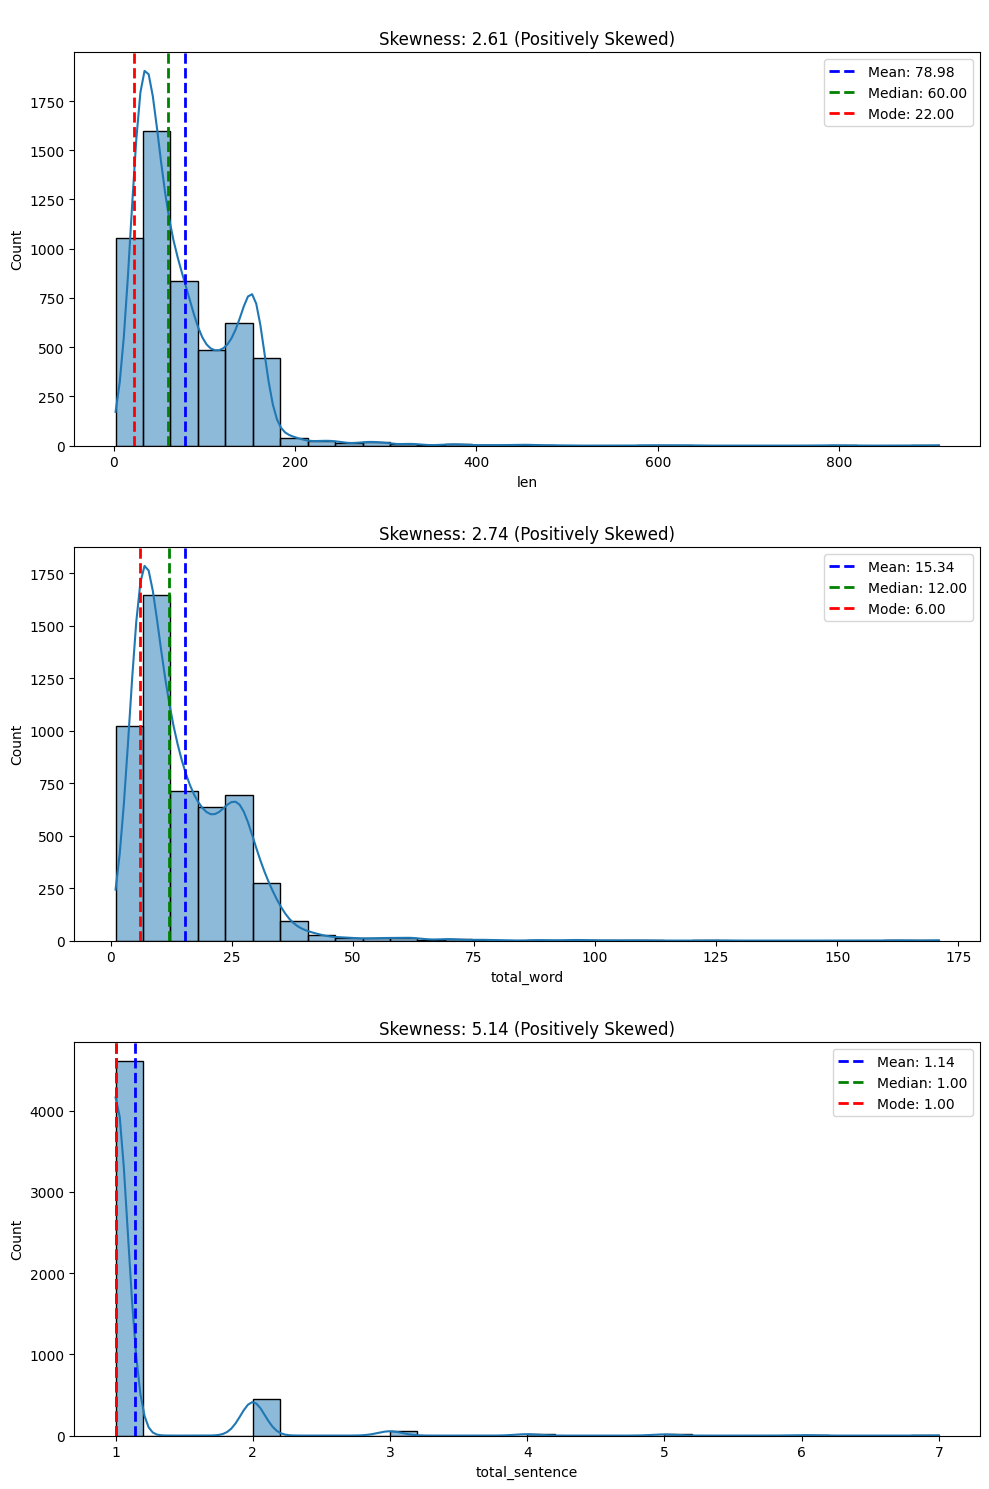

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew

# Calculate mean
mean_values = df[['len', 'total_word', 'total_sentence']].mean()
# Calculate median
median_values = df[['len', 'total_word', 'total_sentence']].median()
# Calculate skewness
skewness_values = df[['len', 'total_word', 'total_sentence']].apply(skew)
# Calculate mode separately
modes = df[['len', 'total_word', 'total_sentence']].mode().iloc[0]

# Determine skewness type
def get_skewness_type(skewness):
    if skewness > 0:
        return 'Positively Skewed'
    elif skewness < 0:
        return 'Negatively Skewed'
    else:
        return 'Approximately Symmetric'

# Create matplotlib subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Function to add annotations
def add_annotations(ax, mean, median, mode, skewness):
    skew_type = get_skewness_type(skewness)
    ax.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(mode, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
    ax.set_title(f"{ax.get_title()}\nSkewness: {skewness:.2f} ({skew_type})")
    ax.legend()

# Plot 1: Length Distribution
sns.histplot(df['len'], bins=30, kde=True, ax=axs[0])
add_annotations(axs[0], mean_values['len'], median_values['len'], modes['len'], skewness_values['len'])

# Plot 2: Total Word Distribution
sns.histplot(df['total_word'], bins=30, kde=True, ax=axs[1])
add_annotations(axs[1], mean_values['total_word'], median_values['total_word'], modes['total_word'], skewness_values['total_word'])

# Plot 3: Total Sentence Distribution
sns.histplot(df['total_sentence'], bins=30, kde=True, ax=axs[2])
add_annotations(axs[2], mean_values['total_sentence'], median_values['total_sentence'], modes['total_sentence'], skewness_values['total_sentence'])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Three different sets of data: length, total words, and total sentences. Boxplots (also known as whisker plots) are a standard way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Here, outliers are also considered.

### 1. Length

**Given data:**
- Outliers: 66
- Q1 (First Quartile): 26
- Q2 (Median): 60
- Q3 (Third Quartile): 117
- Minimum: 2
- Maximum: 910

**Explanation:**
- **Minimum (2)**: The smallest value in the dataset.
- **Q1 (26)**: 25% of the data falls below this value.
- **Median (Q2, 60)**: The middle value of the dataset. 50% of the data falls below this value.
- **Q3 (117)**: 75% of the data falls below this value.
- **Maximum (910)**: The largest value in the dataset.
- **Outliers (66)**: Values significantly higher or lower than the rest of the data. Typically, outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (Interquartile Range, IQR = Q3 - Q1).

In this dataset, the minimum and maximum values indicate a wide range. The interquartile range (Q3 - Q1 = 117 - 26 = 91) shows the spread of the middle 50% of the data. The presence of outliers suggests there are some values much higher or lower than the rest of the data.

### 2. Total Words

**Given data:**
- Outliers: 68
- Q1 (First Quartile): 7
- Q2 (Median): 12
- Q3 (Third Quartile): 22
- Minimum: 1
- Maximum: 171

**Explanation:**
- **Minimum (1)**: The smallest value in the dataset.
- **Q1 (7)**: 25% of the data falls below this value.
- **Median (Q2, 12)**: The middle value of the dataset. 50% of the data falls below this value.
- **Q3 (22)**: 75% of the data falls below this value.
- **Maximum (171)**: The largest value in the dataset.
- **Outliers (68)**: Values significantly higher or lower than the rest of the data.

Here, the minimum and maximum values indicate a wide range. The interquartile range (Q3 - Q1 = 22 - 7 = 15) shows the spread of the middle 50% of the data. The presence of outliers suggests some values are significantly higher or lower than the rest of the data.

### 3. Total Sentences

**Given data:**
- Outliers: 558
- Q1 (First Quartile): 1
- Q2 (Median): 1
- Q3 (Third Quartile): 1
- Minimum: 1
- Maximum: 7

**Explanation:**
- **Minimum (1)**: The smallest value in the dataset.
- **Q1 (1)**: 25% of the data falls below this value.
- **Median (Q2, 1)**: The middle value of the dataset. 50% of the data falls below this value.
- **Q3 (1)**: 75% of the data falls below this value.
- **Maximum (7)**: The largest value in the dataset.
- **Outliers (558)**: Values significantly higher or lower than the rest of the data.


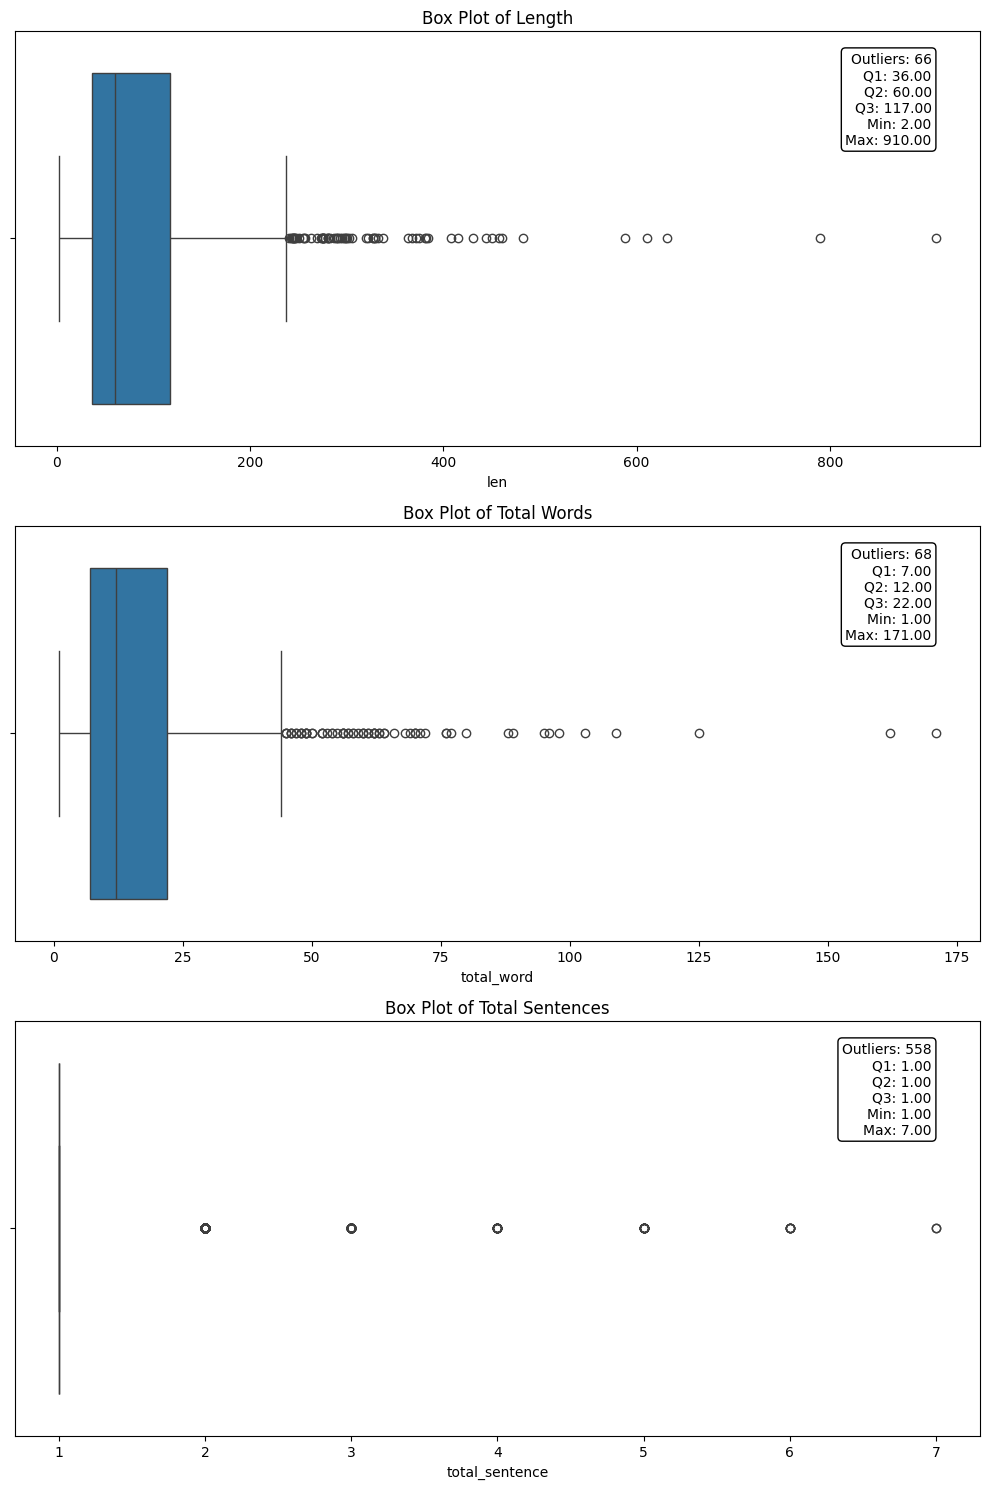

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count outliers and return statistics
def get_boxplot_stats(series):
    q1 = series.quantile(0.25)
    q2 = series.median()
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    min_val = series.min()
    max_val = series.max()
    outliers_count = ((series < lower_bound) | (series > upper_bound)).sum()
    return q1, q2, q3, min_val, max_val, outliers_count

# Box Plot Analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Box plot for 'len'
q1_len, q2_len, q3_len, min_len, max_len, outliers_len = get_boxplot_stats(df['len'])
sns.boxplot(x=df['len'], ax=axs[0])
axs[0].set_title('Box Plot of Length')
axs[0].annotate(f'Outliers: {outliers_len}\nQ1: {q1_len:.2f}\nQ2: {q2_len:.2f}\nQ3: {q3_len:.2f}\nMin: {min_len:.2f}\nMax: {max_len:.2f}',
                xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Box plot for 'total_word'
q1_total_word, q2_total_word, q3_total_word, min_total_word, max_total_word, outliers_total_word = get_boxplot_stats(df['total_word'])
sns.boxplot(x=df['total_word'], ax=axs[1])
axs[1].set_title('Box Plot of Total Words')
axs[1].annotate(f'Outliers: {outliers_total_word}\nQ1: {q1_total_word:.2f}\nQ2: {q2_total_word:.2f}\nQ3: {q3_total_word:.2f}\nMin: {min_total_word:.2f}\nMax: {max_total_word:.2f}',
                xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Box plot for 'total_sentence'
q1_total_sentence, q2_total_sentence, q3_total_sentence, min_total_sentence, max_total_sentence, outliers_total_sentence = get_boxplot_stats(df['total_sentence'])
sns.boxplot(x=df['total_sentence'], ax=axs[2])
axs[2].set_title('Box Plot of Total Sentences')
axs[2].annotate(f'Outliers: {outliers_total_sentence}\nQ1: {q1_total_sentence:.2f}\nQ2: {q2_total_sentence:.2f}\nQ3: {q3_total_sentence:.2f}\nMin: {min_total_sentence:.2f}\nMax: {max_total_sentence:.2f}',
                xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.tight_layout()
plt.show()


In [136]:
df

,label,message,len,total_word,total_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,1
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,1
5570,0,The guy did some bitching but I acted like i'd...,125,26,1


The boxplots for the labels 0 and 1.

### 1. Label 0
**Given data:**
- Outliers: 143
- Q1 (First Quartile): 34
- Q2 (Median): 52
- Q3 (Third Quartile): 90
- Minimum: 2
- Maximum: 910

**Explanation:**
- **Minimum (2)**: The smallest value in the dataset.
- **Q1 (34)**: 25% of the data falls below this value.
- **Median (Q2, 52)**: The middle value of the dataset. 50% of the data falls below this value.
- **Q3 (90)**: 75% of the data falls below this value.
- **Maximum (910)**: The largest value in the dataset.
- **Outliers (143)**: Values significantly higher or lower than the rest of the data. Typically, outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (Interquartile Range, IQR = Q3 - Q1).

The minimum and maximum values indicate a wide range. The interquartile range (Q3 - Q1 = 90 - 34 = 56) shows the spread of the middle 50% of the data. The presence of outliers suggests there are some values much higher or lower than the rest of the data.

### 2. Label 1
**Given data:**
- Outliers: 66
- Q1 (First Quartile): 132
- Q2 (Median): 149
- Q3 (Third Quartile): 157
- Minimum: 13
- Maximum: 224

**Explanation:**
- **Minimum (13)**: The smallest value in the dataset.
- **Q1 (132)**: 25% of the data falls below this value.
- **Median (Q2, 149)**: The middle value of the dataset. 50% of the data falls below this value.
- **Q3 (157)**: 75% of the data falls below this value.
- **Maximum (224)**: The largest value in the dataset.
- **Outliers (66)**: Values significantly higher or lower than the rest of the data.

In this dataset, the minimum and maximum values indicate a narrower range compared to the label 0 dataset. The interquartile range (Q3 - Q1 = 157 - 132 = 25) shows the spread of the middle 50% of the data. The presence of outliers suggests some values are significantly higher or lower than the rest of the data.



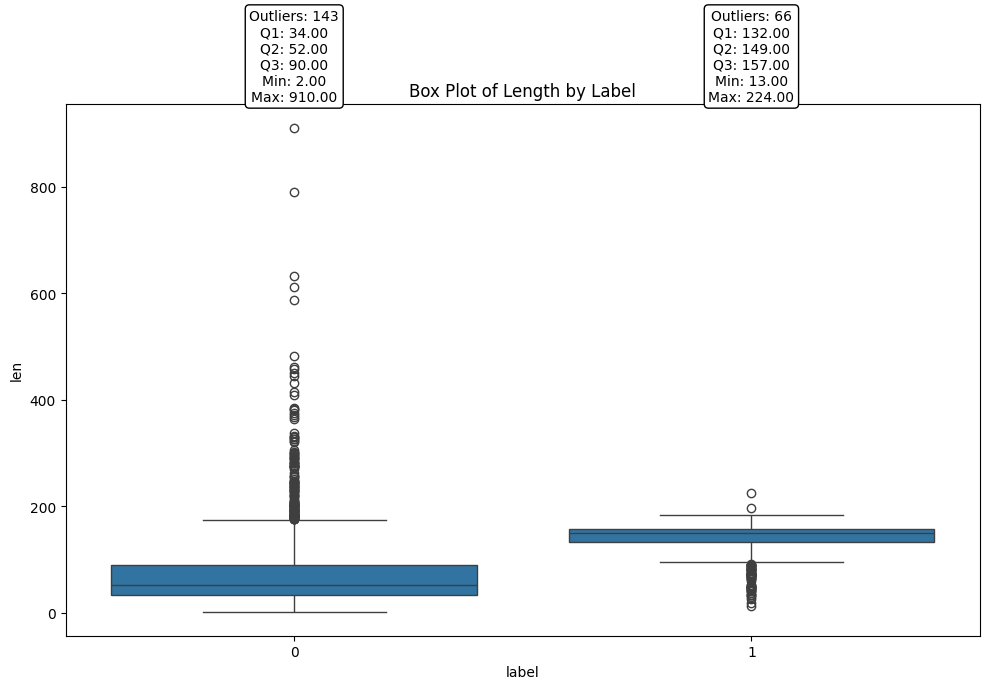

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count outliers and return statistics
def get_boxplot_stats(series):
    q1 = series.quantile(0.25)
    q2 = series.median()
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    min_val = series.min()
    max_val = series.max()
    outliers_count = ((series < lower_bound) | (series > upper_bound)).sum()
    return q1, q2, q3, min_val, max_val, outliers_count

# Box Plot Analysis
fig, ax = plt.subplots(figsize=(10, 7))

# Box plot for 'len' with respect to 'label'
sns.boxplot(x='label', y='len', data=df, ax=ax)
ax.set_title('Box Plot of Length by Label')

# Annotate statistics for each group
for label in df['label'].unique():
    stats = get_boxplot_stats(df[df['label'] == label]['len'])
    q1, q2, q3, min_val, max_val, outliers_count = stats
    label_position = df['label'].unique().tolist().index(label)  # Position of the label in the plot
    ax.annotate(
        f'Outliers: {outliers_count}\nQ1: {q1:.2f}\nQ2: {q2:.2f}\nQ3: {q3:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}',
        xy=(label_position, df['len'].max() * 1.05),  # Slightly above the maximum value
        ha='center', va='bottom', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )

plt.tight_layout()
plt.show()


This plot will show that label 1 has a significantly higher count (4516) compared to label 0 (653).

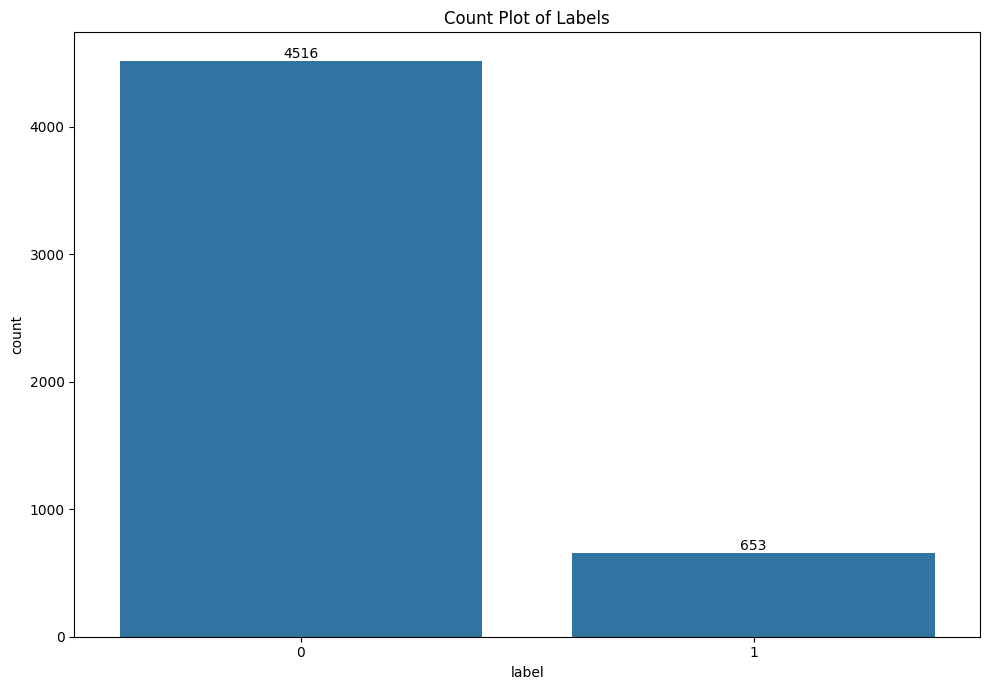

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot Analysis
fig, ax = plt.subplots(figsize=(10, 7))

# Count plot for 'label'
sns.countplot(x='label', data=df, ax=ax)
ax.set_title('Count Plot of Labels')

# Annotate count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


The `transform_text` function performs the following transformations:
1. Converts text to lowercase.
2. Tokenizes the text into words.
3. Removes non-alphanumeric characters.
4. Removes stop words and punctuation.
5. Stems the words to their root forms.
6. Joins the words back into a single string.



In [139]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Adding a new column 'pure_word' by applying the transform_text function to each message

In [140]:
df['pure_word'] = df['message'].apply(transform_text)

<ipython-input-140-9d31ba49a790>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
# Display the DataFrame with the new column
df.head()

,label,message,len,total_word,total_sentence,pure_word
0,0,"Go until jurong point, crazy.. Available only ...",111,20,1,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [142]:
df.columns

Index(['label', 'message', 'len', 'total_word', 'total_sentence', 'pure_word'], dtype='object')

# Selection Feature
There is a very strong positive correlation between the length of the text (`len`) and the total number of words (`total_word`), suggesting that as one increases, so does the other. There are weak positive correlations between the length of the text (`len`) and the total number of sentences (`total_sentence`), and between the total number of words (`total_word`) and the total number of sentences (`total_sentence`). These weak correlations indicate that while there is some tendency for these variables to increase together, the relationship is not very strong.

                     len  total_word  total_sentence
len             1.000000    0.973667        0.214820
total_word      0.973667    1.000000        0.242299
total_sentence  0.214820    0.242299        1.000000


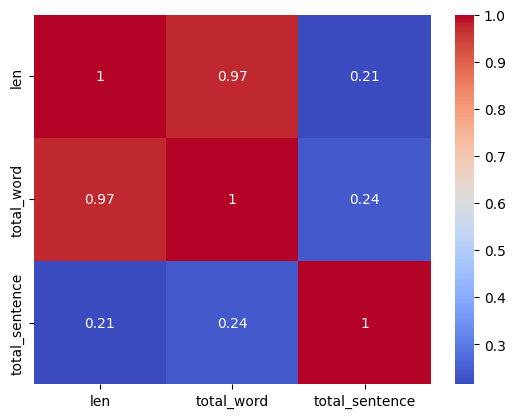

In [143]:
# Correlation Analysis
print(df[['len', 'total_word', 'total_sentence']].corr())
sns.heatmap(df[['len', 'total_word', 'total_sentence']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [144]:
df.columns

Index(['label', 'message', 'len', 'total_word', 'total_sentence', 'pure_word'], dtype='object')

#Models

#Let's analyze the results:
#### Multinomial Naive Bayes:
- **Accuracy**: 0.9555
- **Precision**: 0.95 (class 0), 1.00 (class 1)
- **Recall**: 1.00 (class 0), 0.68 (class 1)
- **F1-Score**: 0.97 (class 0), 0.81 (class 1)
- **Confusion Matrix**: [[889, 0], [46, 99]]

#### Logistic Regression:
- **Accuracy**: 0.9681
- **Precision**: 0.97 (class 0), 0.97 (class 1)
- **Recall**: 1.00 (class 0), 0.79 (class 1)
- **F1-Score**: 0.98 (class 0), 0.87 (class 1)
- **Confusion Matrix**: [[886, 3], [30, 115]]

#### Support Vector Machine (SVM):
- **Accuracy**: 0.9845
- **Precision**: 0.98 (class 0), 1.00 (class 1)
- **Recall**: 1.00 (class 0), 0.89 (class 1)
- **F1-Score**: 0.99 (class 0), 0.94 (class 1)
- **Confusion Matrix**: [[889, 0], [16, 129]]

#### Random Forest:
- **Accuracy**: 0.9758
- **Precision**: 0.97 (class 0), 0.99 (class 1)
- **Recall**: 1.00 (class 0), 0.83 (class 1)
- **F1-Score**: 0.99 (class 0), 0.91 (class 1)
- **Confusion Matrix**: [[888, 1], [24, 121]]

#### K-Nearest Neighbors (KNN):
- **Accuracy**: 0.9004
- **Precision**: 0.90 (class 0), 1.00 (class 1)
- **Recall**: 1.00 (class 0), 0.29 (class 1)
- **F1-Score**: 0.95 (class 0), 0.45 (class 1)
- **Confusion Matrix**: [[889, 0], [103, 42]]

#### Decision Tree:
- **Accuracy**: 0.9623
- **Precision**: 0.97 (class 0), 0.88 (class 1)
- **Recall**: 0.98 (class 0), 0.84 (class 1)
- **F1-Score**: 0.98 (class 0), 0.86 (class 1)
- **Confusion Matrix**: [[873, 16], [23, 122]]

#### AdaBoost:
- **Accuracy**: 0.9729
- **Precision**: 0.98 (class 0), 0.95 (class 1)
- **Recall**: 0.99 (class 0), 0.86 (class 1)
- **F1-Score**: 0.98 (class 0), 0.90 (class 1)
- **Confusion Matrix**: [[882, 7], [21, 124]]

#### Gradient Boosting:
- **Accuracy**: 0.9632
- **Precision**: 0.96 (class 0), 0.98 (class 1)
- **Recall**: 1.00 (class 0), 0.75 (class 1)
- **F1-Score**: 0.98 (class 0), 0.85 (class 1)
- **Confusion Matrix**: [[887, 2], [36, 109]]

#### Bagging:
- **Accuracy**: 0.9662
- **Precision**: 0.97 (class 0), 0.94 (class 1)
- **Recall**: 0.99 (class 0), 0.81 (class 1)
- **F1-Score**: 0.98 (class 0), 0.87 (class 1)
- **Confusion Matrix**: [[881, 8], [27, 118]]

#### Extra Trees:
- **Accuracy**: 0.9836
- **Precision**: 0.98 (class 0), 0.99 (class 1)
- **Recall**: 1.00 (class 0), 0.89 (class 1)
- **F1-Score**: 0.99 (class 0), 0.94 (class 1)
- **Confusion Matrix**: [[888, 1], [16, 129]]

### Analysis:
1. **Accuracy**:
   - SVM and Extra Trees have the highest accuracy at around 0.9845 and 0.9836, respectively.

2. **Precision**:
   - Most models have high precision for class 0, and high but variable precision for class 1. SVM, Extra Trees, and Random Forest perform very well in terms of precision for both classes.

3. **Recall**:
   - Class 0 recall is consistently 1.00 across many models. For class 1, SVM, Extra Trees, and Random Forest have high recall (0.89).

4. **F1-Score**:
   - SVM and Extra Trees again have high F1-scores for both classes, indicating a good balance between precision and recall.

5. **Confusion Matrix**:
   - SVM and Extra Trees have very few misclassifications compared to other models.

### Conclusion:
Based on the overall performance across various metrics, **Support Vector Machine (SVM)** and **Extra Trees** are the best models for this classification task. Both models show high accuracy, precision, recall, and F1-scores, with very few misclassifications.

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df['message']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of pipelines for different classifiers
pipelines = [
    ('Multinomial Naive Bayes', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])),
    ('Logistic Regression', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression()),
    ])),
    ('Support Vector Machine', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC()),
    ])),
    ('Random Forest', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier()),
    ])),
    ('K-Nearest Neighbors', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier()),
    ])),
    ('Decision Tree', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', DecisionTreeClassifier()),
    ])),
    ('AdaBoost', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', AdaBoostClassifier()),
    ])),
    ('Gradient Boosting', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', GradientBoostingClassifier()),
    ])),
    ('Bagging', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', BaggingClassifier()),
    ])),
    ('Extra Trees', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', ExtraTreesClassifier()),
    ])),
]

# Train and evaluate each pipeline
for name, pipeline in pipelines:
    print(f'Training {name}...')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{report}')
    print(f'{name} Confusion Matrix:\n{cm}\n')

Training Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.9555
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Multinomial Naive Bayes Confusion Matrix:
[[889   0]
 [ 46  99]]

Training Logistic Regression...
Logistic Regression Accuracy: 0.9681
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Logistic Regression Confusion Matrix:
[[886 

The high confidence score for 'Ham' (0.89) indicates that the model is very confident in its prediction that "My name is billah" is a legitimate message. The low confidence score for 'Spam' (0.11) reinforces this prediction by suggesting that the model finds it unlikely for the message to be spam.

These scores are useful for understanding not only what the model predicts but also how certain it is about its prediction. In applications like spam detection, high confidence scores for 'Ham' help in accurately filtering out non-spam messages, ensuring that legitimate messages are correctly identified and not misclassified as spam.

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a pipeline for the text classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Train the classifier
text_clf.fit(X_train, y_train)
# Example message input
user_message = input("Enter a message: ")

# Transform the user message
user_message_transformed = transform_text(user_message)

# Predict for the user message
prediction = text_clf.predict([user_message_transformed])[0]

# Get the probabilities of each class (spam and ham)
confidence_scores = text_clf.predict_proba([user_message_transformed])[0]

# Assuming '0' represents 'ham' and '1' represents 'spam'
confidence_ham = confidence_scores[0]
confidence_spam = confidence_scores[1]

# Print the prediction and confidence scores
print(f"Predicted Label: {'Spam' if prediction == 1 else 'Ham'}")
print(f"Confidence (Ham): {confidence_ham:.2f}")
print(f"Confidence (Spam): {confidence_spam:.2f}")

Enter a message: My name is billah
Predicted Label: Ham
Confidence (Ham): 0.89
Confidence (Spam): 0.11
